## Ejercicio 2 (Puntos extra): 
Resolver ecuación de Poisson unidimensional con $\rho (x)=\cos(x)$, en el dominio $[0,2 \pi]$, utilizando una malla con 12 puntos. Aquí nuevamente hay 10 incognitas, sin embargo note que para el método es mas conveniente definir $\vec f$ incluyendo las condiciones de frontera.

In [2]:
function crearmatrizpoisson(m)
   
    D1=zeros(m,m)
        for i in 1:m

         if i-1==0 ## puntos del interior 
                  D1[i,i]=-2
                  D1[i,i+1]=1
            elseif i-1>=1 && 1+i<=m  #aristasuperiorizquierda
                
                     D1[i,i]=-2
                  D1[i,i-1]=1
                D1[i,i+1]=1
            elseif i+1>m #arista superior derecha
                    D1[i,i]=-2
                  D1[i,i-1]=1
            end 
    end
                
    return D1
end

crearmatrizpoisson (generic function with 1 method)

In [3]:
crearmatrizpoisson(10)

10×10 Array{Float64,2}:
 -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0

In [4]:
b=zeros(1,3)


1×3 Array{Float64,2}:
 0.0  0.0  0.0

In [5]:
function construyeb(f,fr,x)
    n=length(x)-2
    b=zeros(n,1)
    h=abs(x[2]-x[1])
    for i in 1:n
           if  i==1
              b[i]=-fr[1]+(h^2)*f(x[i+1])
            elseif i==n  
              b[i]=-fr[2]+(f(x[n-1]))*h^2
            else
            b[i]=f(x[i])*h^2
        end
           
    end
    return b
end

construyeb (generic function with 1 method)

In [6]:
linspace(0,2*pi,12)

0.0:0.5711986642890533:6.283185307179586

In [7]:
construyeb(x->cos(x),[0,0],linspace(0,2*pi,12))

10×1 Array{Float64,2}:
  0.274474 
  0.274474 
  0.135537 
 -0.0464328
 -0.21366  
 -0.313052 
 -0.313052 
 -0.21366  
 -0.0464328
 -0.0464328

In [8]:
function if2(w,u)
        v=[]
        
        for i in 1:length(w)+2
            if i==1
              push!(v,u[1])
            elseif i==length(w)+2 
              push!(v,u[2])
            else
             push!(v,w[i-1])
            end
        end
        return v
    end

if2 (generic function with 1 method)

In [9]:
if2((crearmatrizpoisson(10)^(-1))*construyeb(x->cos(x),[0,0],linspace(0,2*pi,12)),[0,0])

12-element Array{Any,1}:
  0        
 -0.0995059
  0.0754621
  0.524904 
  1.10988  
  1.64843  
  1.97331  
  1.98515  
  1.68393  
  1.16905  
  0.607743 
  0        

In [10]:
(crearmatrizpoisson(10)^(-1))*construyeb(x->cos(x),[0,0],linspace(0,2*pi,12))

10×1 Array{Float64,2}:
 -0.0995059
  0.0754621
  0.524904 
  1.10988  
  1.64843  
  1.97331  
  1.98515  
  1.68393  
  1.16905  
  0.607743 

In [11]:
using PyPlot

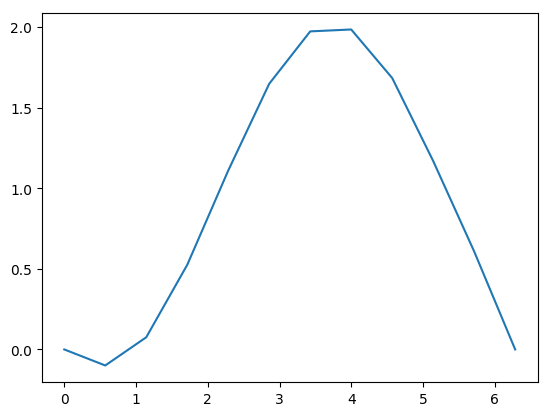

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3f9f8de210>

In [12]:
plot(linspace(0,2*pi,12),if2((crearmatrizpoisson(10)^(-1))*construyeb(x->cos(x),[0,0],linspace(0,2*pi,12)),[0,0]))

## Ejercicio 3 (Puntos extra): 
Resolver ecuación de calor en una dimensión, en el dominio $[0,1]$, con $f(0)=10$, $f(1)=0$, en una malla con 12 puntos. Aqui obviamente habrá 10 incognitas: $f_1, \dots, f_{10}$. La condición inicial que deberán usar es $\vec f^{[0]}=(5,4,3,2,1,3,5,7,7,8)^{\text{T}}$.
Utilizando método de Euler.
Utilizando Runge-Kutta de orden 4.
Puede hacer este ejercicio construyendo $A$ y $\vec b$, para así utilizar las rutinas que ya tienen de RK4 y Euler, noten que aqui $A\vec f +\vec b$ define la función del sistema dinámico de $n=10$ dimensiones.
La otra opción es implementar una rutina que aplique el laplaciano discreto a $\vec f$, digamos $\vec r= D_{h_x}[\vec f]$, de esta forma es facil construir la función que define el sistema dinámico en cada paso.
Graficar en varios tiempos (no en todos en caso de que hagan una partición grande, solo los primeros tiempos y los últimos).

In [78]:
function creador1(Front,x0,xf,n)
    A = zeros(n-2,n-2)
    b = zeros(n-2)
    h = (xf-x0)/n
    
    for i in 1:n-2
        creador2(A,b,n-2,Front,i,h)
    end        
    
    return [A,b]
end

creador1 (generic function with 1 method)

In [79]:
function I(x)
    n=length(x)
   xs= zeros(n-2)
    for i in 1:n-2
      xs[i] = x[i+1] 
    end
    return xs
end

I (generic function with 1 method)

In [80]:
function creador2(A,b,n,Front,i,h)
   #=Aqui por suerte solo hay tres casos=# 
    A[i,i] = -2/h
     if(i == n)
        b[i] -=Front[2]/h
        A[i,i-1] = 1/h
     elseif(i == 1)
        b[i] -= Front[1]/h
        A[i,i+1] = 1/h
    else
        A[i,i+1] = 1/h
        A[i,i-1] = 1/h
    end
end

creador2 (generic function with 1 method)

In [81]:
xo=linspace(0,1,12)

0.0:0.09090909090909091:1.0

In [82]:
I(xo)

10-element Array{Float64,1}:
 0.0909091
 0.181818 
 0.272727 
 0.363636 
 0.454545 
 0.545455 
 0.636364 
 0.727273 
 0.818182 
 0.909091 

In [83]:
s = creador1([0,10],0,1,12)
f(t,x) = s[1]*x -s[2]

f (generic function with 1 method)

In [84]:
CI = [5,4,3,2,1,3,5,7,7,8]

10-element Array{Int64,1}:
 5
 4
 3
 2
 1
 3
 5
 7
 7
 8

In [85]:
 using PyPlot
    plt = PyPlot

PyPlot

In [86]:
push!(LOAD_PATH,pwd())
import herramientas
using herramientas
eulerSolucion = eulerFunction(f,0,1,CI,0.001)
rungeSolucion = espaaciofaserungeKutta2e(f,0,1,CI,0.001)
is = floor(size(eulerSolucion[1],1)/10)
    using PyPlot
    plt = PyPlot

PyPlot

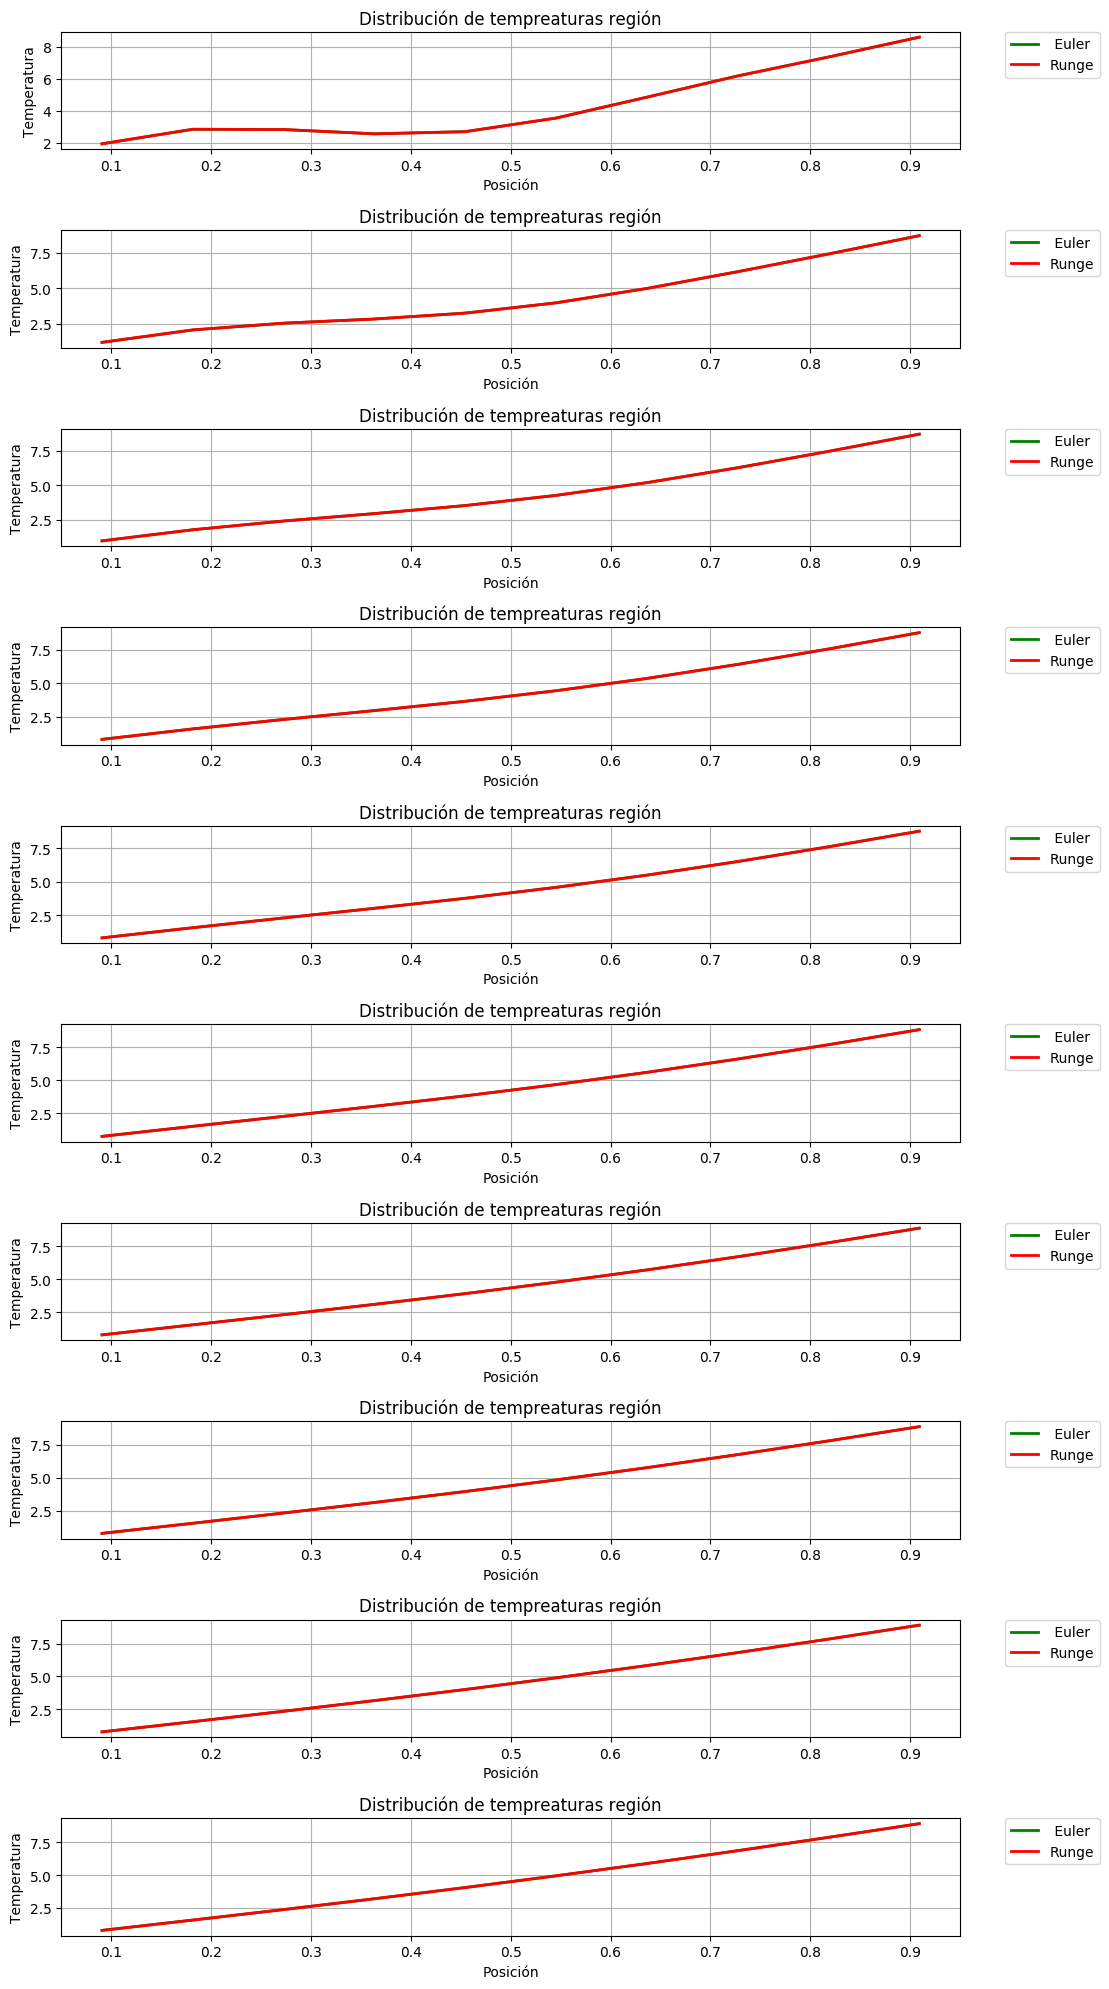

In [87]:


    plt.figure(figsize=(10, 20))
    for i in 1:10
    plt.subplot(10,1,i)
    plt.xlabel("Posición")
    plt.ylabel("Temperatura")
    plt.title("Distribución de tempreaturas región")
    plt.grid()
    plt.tight_layout()
    plt.plot(I(xo),eulerSolucion[2][convert(Int,i*is)],label =" Euler",linewidth =2,color="green") 
    plt.plot(I(xo),rungeSolucion[2][convert(Int,i*is)],label = "Runge",linewidth = 2,color="red")
      legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    ax = gca()
end